In [1]:
!pip install matplotlib

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Install pydub if not already installed
!pip install pydub

In [43]:
from pydub import AudioSegment
import numpy as np
from pydub.silence import split_on_silence
from pydub.playback import play
import IPython
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import IPython.display
import os

In [44]:
# Directory containing the .wav files
src='/content/drive/MyDrive/contribute_voice_wav/Md_Nadimul_Islam.wav'

In [45]:
audio=AudioSegment.from_wav(src)

In [46]:
rt, dt = read(src)
IPython.display.Audio(data=dt, rate=rt)

<ipython-input-46-96dd7375d9e9>:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rt, dt = read(src)


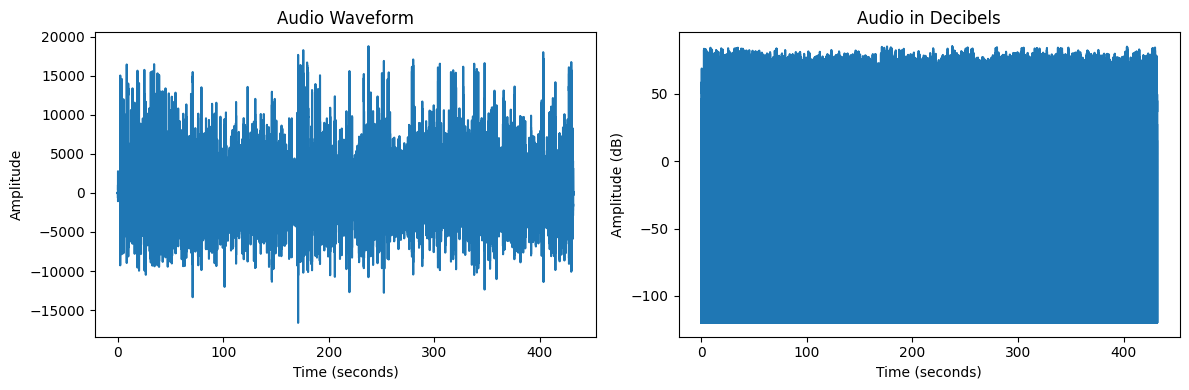

In [47]:


# Convert amplitude to decibels (dB)
dt_dB = 20 * np.log10(np.abs(dt) + 1e-6)  # Adding a small value to avoid log(0)

# Plotting the graph
duration_seconds = len(audio) / 1000.0
time_intervals = np.linspace(0, duration_seconds, len(dt))

# Plot in time domain
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(time_intervals, dt)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.title('Audio Waveform')

# Plot in dB domain
plt.subplot(1, 2, 2)
plt.plot(time_intervals, dt_dB)
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude (dB)')
plt.title('Audio in Decibels')

plt.tight_layout()
plt.show()

In [48]:

def audio_split(minS, silanceT):
  audio_chunks = split_on_silence(audio,min_silence_len= minS, silence_thresh= silanceT)
  return audio_chunks
    # consider it silent if quieter than -16 dBFS
    # must be silent for at least half a second

#len(audio_chunks)

In [39]:

minS = 260
silanceT = -32
audio_chunks = audio_split(minS, silanceT)

In [40]:
print(len(audio_chunks))

323


In [41]:
a = minS
b = silanceT

In [49]:
while True:
  if len(audio_chunks) == 323 or len(audio_chunks) == 324: # or len(audio_chunks) == 117:
    finalChunks = audio_chunks
    break
  else:
    a += 10
    b -= 1
    print(a, b)
    audio_chunks = audio_split(a, b)
    print(len(audio_chunks))

print('Final: ', len(finalChunks))



Final:  323


In [50]:
len(audio_chunks)

323

In [52]:
des_folder = '/content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam'
file_name = os.path.splitext(os.path.basename(src))[0]
des = os.path.join(des_folder, file_name)
os.makedirs(des, exist_ok=True)  # Creates folder if it doesn't exist

In [53]:
for i, chunk in enumerate(finalChunks):

    out_file = des+"54_chunk{0}.wav".format(i+1)
    print ("exporting", out_file)
    chunk.export(out_file, format="wav")

exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk1.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk2.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk3.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk4.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk5.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk6.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk7.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk8.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul_Islam54_chunk9.wav
exporting /content/drive/MyDrive/sorted_file_goes_here/Md_Nadimul_Islam/Md_Nadimul

In [55]:
# testing chunk

rt, dt = read(des+"54_chunk323.wav")
IPython.display.Audio(data=dt, rate=rt)